 # Gray-Scott Model for Reaction-Diffusion
 
 A simulation of two chemicals (A and B) reacting and diffusing on a 2D grid using the  [Gray-Scott model](https://www.algosome.com/articles/reaction-diffusion-gray-scott.html).
 
Chemical A is added at a certain "feed" rate. Two Bs convert an A into a B (reaction). Chemical B is removed at a certain "kill" rate. The system can be approximated by using two numbers at each grid cell for the local concentrations of A and B. The concentration ranges from 0 to 1, under the restriction $0 \leq A+B \leq 1$. Both A and B diffuse so uneven concentrations spread out across the grid, however, A diffuses faster than B. When a large grid with many cells is simulated, complex patterns can emerge.
 
The grid is repeatedly updated to update the concentrations A and B of each cell using the following system of equations:

$$A' = A + (D_{A}\nabla^{2}A - AB^{2} + f(1-A))\Delta t$$
$$B' = B + (D_{b}\nabla^{2}B + AB^{2} - (k+f)B)\Delta t$$

where $A'$ and $B'$ are the new values for the concentrations, $A$ and $B$ are the previous values for the concentration, $D_{a}$ and $D_{b}$ are the diffusion rates for A and B, $f(1-A)$ is the feed rate scaled by $(1-A)$ so $A$ doesn't exceed 1.0.

$\Delta t$ is the time step for each iteration, $k$ is the kill rate which is scaled by $B$ so it doesn't go below 0 ($f$ is added to $k$ so the kill rate is never less than the feed rate).

The $AB^{2}$ terms account for the reaction rate, where the chance that 1 $A$ and 2 $B$ will come together is $A*B*B$. Since $A$ is converted to $B$ in the case of a reaction, this amount is subtracted from $A$ and added to $B$.

$\nabla^{2}A$ and $\nabla^{2}B$ are the Laplacians of A and B, which gives the difference between the average of nearby grid cells and the centre cell. This simulates diffusion as $A$ and $B$ become more like their neighbours. The Laplacian is performed with a convolution using the 3x3 kernel given by

$$\begin{bmatrix}
0.05 & 0.2 & 0.05\\ 
0.2 & -1 & 0.2\\ 
0.05 & 0.2 & 0.05
\end{bmatrix}$$

The grid is initialised with $A = 1$, $B = 0$ and a small area is seeded with $B = 1$.

Adjusting the two parameters for the feed rate and kill rate can produce a large range of results. We can visualise the grid by assigning each cell a colour based on its $A$ and $B$ values. For a large discussion on the parameter values and their respective patterns, see Robert Munafo's [detailed page](http://mrob.com/pub/comp/xmorphia/pearson-classes.html) on the subject.

In [74]:
#Import relevant libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random
from scipy import ndimage
from scipy import signal

In [75]:
def diffusion_2D(f, k, stoptime, width):
    #da and db = diffusion rates, dt = time step, t = starting time
    da,db,dt,t = 1,.5,1,0
    
    #3x3 kernel for convolution
    kernel = np.array([[0.05, 0.2, 0.05],[0.2, -1, 0.2], [0.05, 0.2, 0.05]])
    
    #initialise the grid, A=1 and B=0
    A = np.ones([width,width])
    B = np.zeros([width,width])
    
    #add small seed area
    x = int(width/2)
    B[x:x+1+int(width/64),x:x+1+int(width/64)] = 1
    
    #update the grid using the diffusion equations
    while t<stoptime:      
        A += (da*ndimage.convolve(A,kernel,mode='reflect',cval=0.0) - A*B**2 + f*(1-A))*dt
        B += (db*ndimage.convolve(B,kernel,mode='reflect',cval=0.0) + A*B**2 - (k+f)*B)*dt
        t +=  dt
    return A, B

**f = 0.055, k = 0.062**

(-0.5, 255.5, 255.5, -0.5)

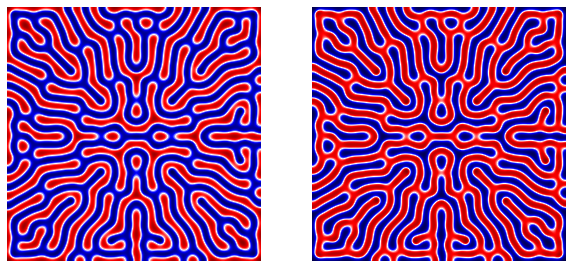

In [76]:
plt.rcParams['figure.figsize'] = [10, 5]

#f = feed rate, k = kill rate, da and db = diffusion rates
f,k,width,stoptime = .055, .062, 256, 30000      
A, B = diffusion_2D(f, k, stoptime, width)

plt.subplot(1, 2, 1)
plt.imshow(A,interpolation='Gaussian',cmap='seismic');
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(B,interpolation='Gaussian',cmap='seismic');
plt.axis('off')

**f = 0.014, k = 0.047**

(-0.5, 255.5, 255.5, -0.5)

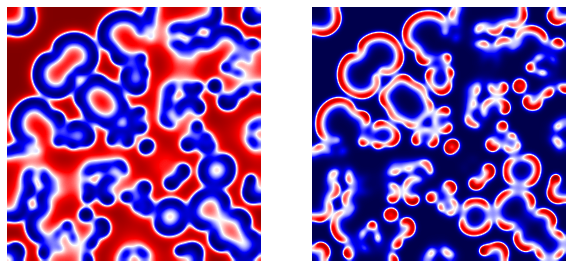

In [77]:
f,k,width,stoptime = .014, .047, 256, 15000      
A, B = diffusion_2D(f, k, stoptime, width)

plt.subplot(1, 2, 1)
plt.imshow(A,interpolation='Gaussian',cmap='seismic');
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(B,interpolation='Gaussian',cmap='seismic');
plt.axis('off')

**f = 0.022, k = 0.051**

(-0.5, 255.5, 255.5, -0.5)

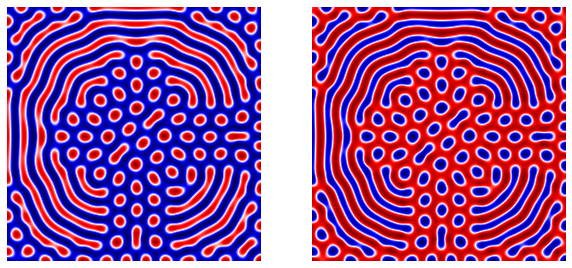

In [78]:
f,k,width,stoptime = .022, .051, 256, 15000      
A, B = diffusion_2D(f, k, stoptime, width)

plt.subplot(1, 2, 1)
plt.imshow(A,interpolation='Gaussian',cmap='seismic');
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(B,interpolation='Gaussian',cmap='seismic');
plt.axis('off')